In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools  import adfuller

In [2]:
df = pd.read_csv('../data/processed/airline_passengers.csv', index_col='Month', parse_dates=True)

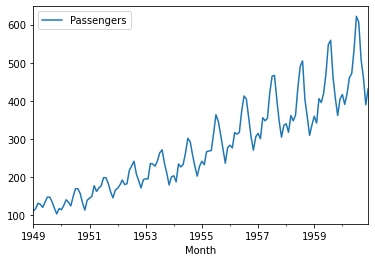

In [3]:
df.plot();

In [4]:
adfuller(df['Passengers'])

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [9]:
def adf(x):
    res = adfuller(x)
    print("Test-Statistic", res[0])
    print("P-Value:", res[1])
    if res[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

In [24]:
adf(df['Passengers'])

Test-Statistic 0.8153688792060423
P-Value: 0.9918802434376409
Non-Stationary


In [25]:
adf(np.random.randn(100))

Test-Statistic -10.71343928592494
P-Value: 3.287052096285715e-19
Stationary


In [72]:
adf(np.random.gamma(1, 1, 100))

Test-Statistic -10.212927582998816
P-Value: 5.576916020813527e-18
Stationary


In [27]:
df['LogPassengers'] = np.log(df['Passengers'])

In [14]:
adf(df['LogPassengers'])


Test-Statistic -1.7170170891069714
P-Value: 0.4223667747703857
Non-Stationary


In [15]:
df['Diff'] = df['Passengers'].diff()


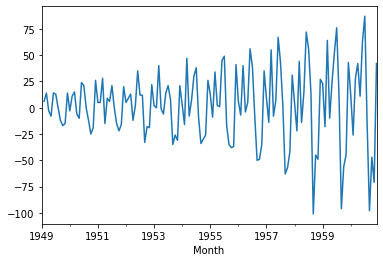

In [16]:
df['Diff'].plot();

In [17]:
adf(df['Diff'].dropna())

Test-Statistic -2.8292668241699874
P-Value: 0.05421329028382711
Non-Stationary


In [28]:
df['DiffLog'] = df['LogPassengers'].diff()

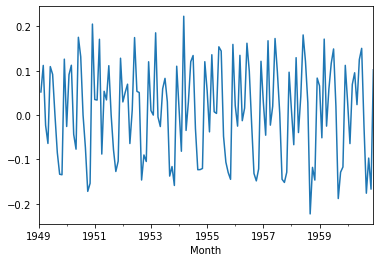

In [29]:
df['DiffLog'].plot();

In [40]:
adf(df['DiffLog'].dropna())

Test-Statistic -2.717130598388145
P-Value: 0.0711205481508568
Non-Stationary


In [73]:
stocks = pd.read_csv('../data/processed/ibovfull.csv', index_col='Date', parse_dates=True)

In [74]:
stocks

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2016-01-04,17.730000,17.730000,17.209999,17.209999,14.775685,13206900.0,ABEV3
2016-01-05,17.250000,17.520000,17.110001,17.480000,15.007494,10774200.0,ABEV3
2016-01-06,17.360001,17.480000,17.200001,17.309999,14.861542,7739100.0,ABEV3
2016-01-07,17.170000,17.320000,16.850000,16.850000,14.466608,15316400.0,ABEV3
2016-01-08,16.930000,17.200001,16.930000,17.070000,14.655489,10684000.0,ABEV3
...,...,...,...,...,...,...,...
2021-02-05,33.500000,34.450001,33.009998,34.000000,34.000000,2969700.0,YDUQ3
2021-02-08,33.480000,33.580002,33.080002,33.360001,33.360001,2721600.0,YDUQ3
2021-02-09,33.330002,33.330002,32.430000,32.840000,32.840000,5718800.0,YDUQ3


In [75]:
itub = stocks[stocks['Name'] == 'ITUB4'][['Close']]

In [76]:
itub['LogPrice'] = np.log(itub['Close'])

In [77]:
itub['LogRet'] = itub['LogPrice'].diff()

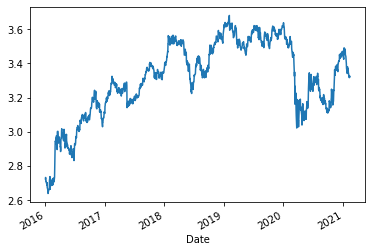

In [78]:
itub['LogPrice'].plot();

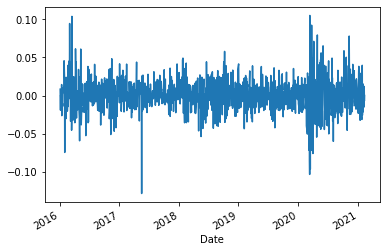

In [79]:
itub['LogRet'].plot();

In [80]:
adf(itub['LogPrice'])

Test-Statistic -3.1525943809704806
P-Value: 0.02289797798285056
Stationary


In [81]:
adf(itub['LogRet'].dropna())

Test-Statistic -9.043336474198975
P-Value: 5.063810473601421e-15
Stationary


In [82]:
mglu = stocks[stocks['Name'] == 'MGLU3'][['Close']]

In [83]:
mglu['LogPrice'] = np.log(mglu['Close'])

In [84]:
mglu['LogRet'] = mglu['LogPrice'].diff()

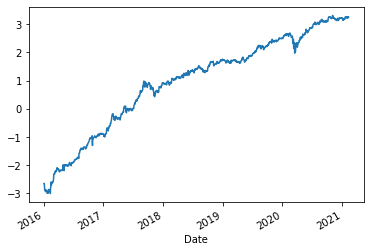

In [85]:
mglu['LogPrice'].plot();

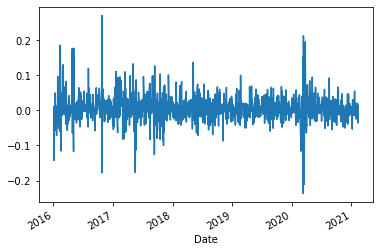

In [86]:
mglu['LogRet'].plot();

In [87]:
adf(mglu['LogPrice'])

Test-Statistic -2.946908003262025
P-Value: 0.04015885528055579
Stationary


In [88]:
adf(mglu['LogRet'].dropna())

Test-Statistic -13.862206579964855
P-Value: 6.697158507433759e-26
Stationary
